In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:


# Example for Windows (notice the r'' to handle backslashes)
df = pd.read_csv(r"C:\Users\sudha\Downloads\data analytics\delivery_time.csv.csv")


print(df.head())

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = df.rename(columns={'Sorting_time':'Sorting_time','Delivery_time':'Delivery_time'})

print("Shape:", df.shape)
print("\nInfo:"); print(df.info())
print("\nSummary:"); display(df.describe())


Shape: (21, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None

Summary:


,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [23]:
print(df.columns)

Index(['Delivery Time', 'Sorting Time'], dtype='object')


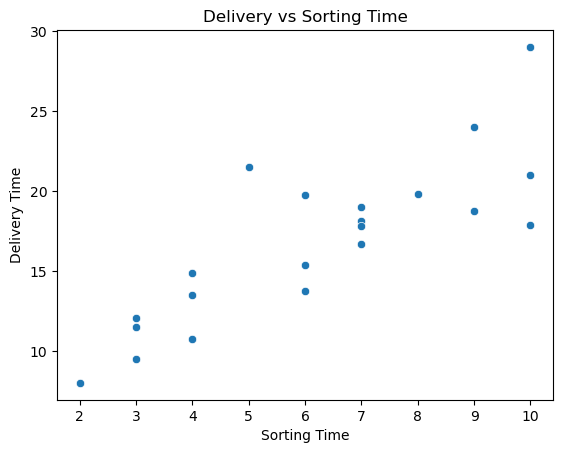

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Sorting Time', y='Delivery Time', data=df)
plt.title("Delivery vs Sorting Time")
plt.show()

In [26]:
import statsmodels.api as sm

X = df[['Sorting Time']]
y = df['Delivery Time']

Xc = sm.add_constant(X)   # add intercept
model = sm.OLS(y, Xc).fit()
print(model.summary()

                            OLS Regression Results                            
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 25 Dec 2025   Prob (F-statistic):           3.98e-06
Time:                        20:44:43   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823   

In [27]:
# Predict for 3 new Sorting Time values
new_data = pd.DataFrame({'Sorting Time':[6.5, 8.0, 12.0]})
new_data = sm.add_constant(new_data)
preds = model.predict(new_data)

output = pd.DataFrame({'Sorting Time':[6.5,8.0,12.0],
                       'Predicted Delivery Time':preds})
print(output)

# Save to CSV
output.to_csv("Delivery_time_predictions.csv", index=False)

   Sorting Time  Predicted Delivery Time
0           6.5                17.301363
1           8.0                19.774893
2          12.0                26.370973
